# Triads
## Local Clustering Coefficient
     # of pairs of X's friends who are friends
     ------------------------------------------
     # of (possible) pairs of X's friends
     
     * NB: We will assume that the LCC of node with degree < 2 to be 0 

## Global Clustering Coefficient

    Measuring clusters on the whole network:
    a) Approach I: Average LCC over all nodes
    b) Approach II: open triads
        Transitivity = 3*Number of closed triads/number of open triads
    c) Difference:
        Both measure the tendency for edges to form triangles
        Transitivity weighs nodes with large degree higher
        
# Distance
    
    Path length: number of steps it takes from A to B
    Distance between two nodes: the length of the shortest path between them
    nx.shortest_path(G,'A','B')
    nx.shortest_path_length( ~ )
    
    Distance from A to every other node:
    Breadth-first search: 
        Start from A, to neartest node with distance of 1, from those nodes, to ~ 1 (not duplicated)
        T = nx.bfs_tree(G,'A'): return the tree
        T.edges(): return the edges
        
    Distance between all pairs of nodes:
    a) Average distance: nx.average_shortest_path_length(G)
    b) Diameter: maximum distance between any pair of nodes: nx.diameter(G)
    c) Eccentricity: nx.eccentricity(G)
        radius: minimum eccentricity
        nx.radius(G)
    d) Periphery: the set of nodes that have eccentricity equal to the diameter
        nx.periphery(G)
    e) Center: nx.center(G)
    

<IPython.core.display.Javascript object>


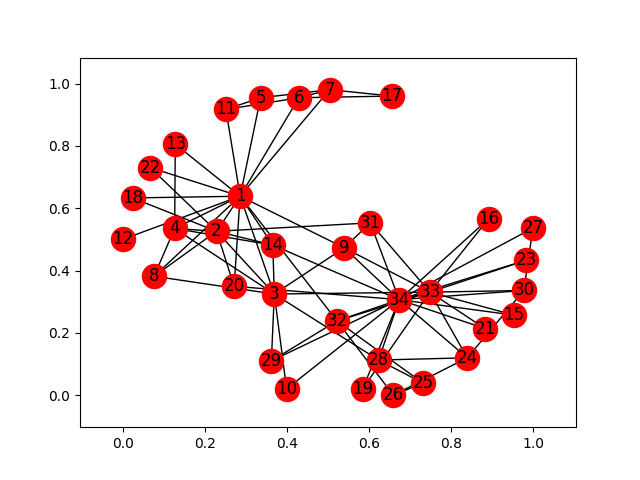

Average distance among all nodes is 2.408199643493761 
  Maximum distance between any pair of nodes is 5 
 Nodes are [17, 15, 16, 19, 21, 23, 24, 30, 27] 
 Minimum distance between any pair of nodes is 3 
 Nodes are [1, 2, 3, 4, 9, 14, 20, 32]


In [3]:
%matplotlib notebook
import networkx as nx
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label = 1)
nx.draw_networkx(G)
print('Average distance among all nodes is',nx.average_shortest_path_length(G),'\n ',
      'Maximum distance between any pair of nodes is',nx.diameter(G),'\n',
     'Nodes are',nx.periphery(G),'\n',
     'Minimum distance between any pair of nodes is',nx.radius(G),'\n',
     'Nodes are',nx.center(G))

# Visualizing Networks

What is Network?
a) Nodes
b) Edges

In [1]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

<IPython.core.display.Javascript object>


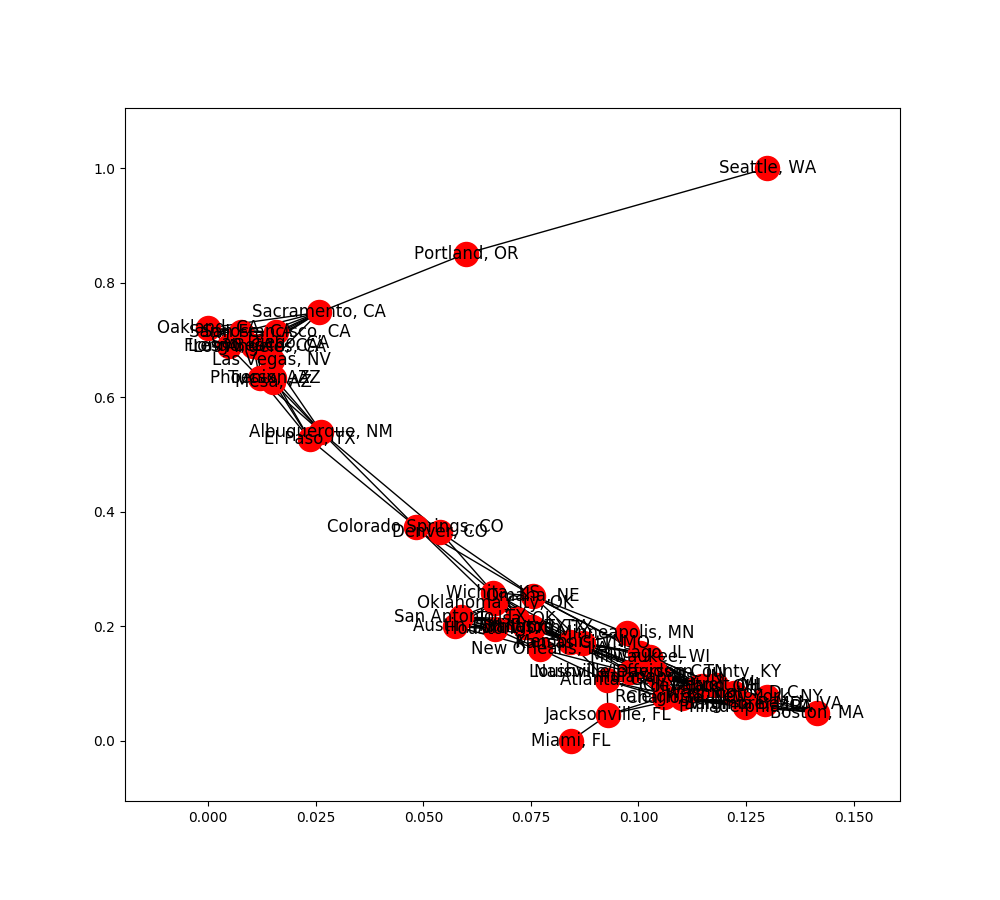

In [2]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [ ]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

In [ ]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();